In [1]:
# define relevants paths and load functions and libraries

%run Bianchini2025_SC\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'Bianchini2025_SC\\Datasets\\' # your data path
saving_path = 'Bianchini2025_SC\\Figures_output\\' # your saving figures path

In [2]:
# import relevant datasets

# load the main dataset
file= ''.join([data_path,'neurons_datasets\\delay_tuning_dataset.mat']) 
data_dict = mat73.loadmat(file)
DAT=data_dict['merged_dataset']

# check keys available
print(DAT.keys())

# extract all keys
for k in DAT.keys():
    globals()[k] = DAT[k]

dict_keys(['AP_lim', 'ML_lim', 'all_boot_aud', 'all_boot_vis', 'animal_ID', 'binSize', 'coord3D', 'depth_lim', 'experiment_ID', 'modality', 'peaks', 'pvals', 'resp', 'spikes', 'trials', 'window_spikes'])


In [3]:
# for plotting example neurons you need to load also the raster and the psth
plot_examples = 1

if plot_examples == 1:
    # load the raster data
    file=''.join([data_path,'neurons_datasets\\raster_delay_tuning_dataset.mat'])
    data_dict = mat73.loadmat(file)
    raster=data_dict['raster']
    raster = raster['tr']

    # load the IFR data
    file=''.join([data_path,'neurons_datasets\\psth_delay_tuning_dataset.mat'])
    data_dict = mat73.loadmat(file)
    IFRs = data_dict['neuron_IFR']['mean']
    

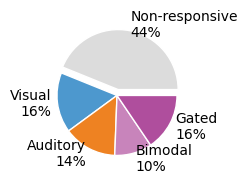

In [4]:
# Plot pie chart with proportions - Fig 1C

# modality contains information about the response type of the neurons:
# modality 1: visual, modality 2: auditory, modality 3: bimodal, modality 4: gated neuron.
TOT = modality.shape[0]
vis = modality[modality==1]
aud = modality[modality==2]
bimodal = modality[modality==3]
gated = modality[modality==4]


# Calculate non-respondents
non_resp = TOT - len(vis) - len(aud) - len(bimodal) - len(gated)

# Calculate percentages
percentages = [non_resp, len(vis), len(aud),len(bimodal), len(gated)]
total = sum(percentages)
percentages_float = [count / total for count in percentages]

# Round percentages
rounded_percentages = [round(percentage * 100) for percentage in percentages_float]
mylabels = ['Non-responsive' ,'Visual','Auditory','Bimodal','Gated']
# Create labels with rounded percentages
labels_with_percentages = [f'{label}\n{percentage}%' for label, percentage in zip(mylabels, rounded_percentages)]

# Define colors, explode, and create the pie chart
colors = ['gainsboro','#4D98CE','#EE8222','#c884bb','#AF4E9D']
myexplode = [0.1, 0, 0, 0,0]

fig, axs = plt.subplots(figsize=(1.5,1.5))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

axs.pie(percentages_float,
        labels=labels_with_percentages,
        explode=myexplode,
        colors=colors,
        autopct=None,  # Disable default percentage display
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.show()

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

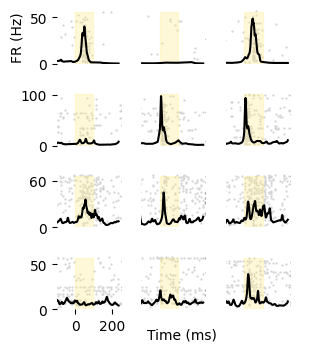

In [5]:
# Plot example responsive neurons - Fig 1Da

# Define the neurons to plot
good_vis, good_aud, aud_vis, good_multi = [1392, 4097, 3041, 4041]
ids=np.array([good_vis,good_aud,aud_vis,good_multi])

# select the AV condition
delay_cond = np.zeros(len(ids))
delay_cond[3] = 2
n_stim = 3

# Make sure the IFR is an array 
IFRs = np.array(IFRs) 

# Define the plotting positions
pos = np.arange(len(ids) * n_stim)
pos = pos.reshape(-1,n_stim)
this_order = np.arange(0,len(ids)*n_stim*2,2).T.flatten()
count_me = 0

# Plot them
dims = (len(ids), n_stim*2)
fig, axs = plt.subplots(*dims, figsize=(2.5, 3),
                        gridspec_kw={'width_ratios': [1, 0.2, 1, 0.2, 1, 0.2], 
                                     'wspace': 0.1, 'hspace': 0.5})

# Adjust the figure margins to eliminate whitespace
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
pos=np.arange(0,23,2)
x_pos = np.arange(0,len(ids)+1,2)
y_pos = np.arange(0,len(ids),1)

for i in range(len(ids)):

    actual = IFRs[ids[i]]  # Now this is shaped trials x time
    actual = np.reshape(actual,(-1,1000))  # Now this is shaped trials x time
    maxFR = np.nanmax(actual)
    raster_now = raster[ids[i]]
    stims = [actual.shape[0] - 2, actual.shape[0] - 1, int(delay_cond[i])]

    for t in range(n_stim):
        this_ax = axs[y_pos[i], x_pos[t]]
        x = raster_now['x'][stims[t]][1::3]
        y = raster_now['y'][stims[t]][1::3]
        this_ax.grid(False)
        this_ax.set_xlim([-0.1, 0.25]) # here I set the time 
        this_ax.set_ylim([0, 53]) #it's a maxiumum of 50 trials
        start = 0
        hight = 50
        this_ax.scatter(x, y, s=0.3, c='#A0A0A0')

        rect = Rectangle((start, 0), 0.1, hight, linewidth=1, edgecolor='gold', facecolor='gold', zorder=1,alpha=0.3)
        this_ax.add_patch(rect)

        this_ax.set_xticks([])
        this_ax.set_yticks([])
        
        # Remove the spines from the original subplot
        this_ax.spines[:].set_visible(False)
        
        # Ticks only for the first plot
        if t == 0 and i == len(ids)-1:
            this_ax.set_xticks([0, 0.2])
            this_ax.set_xticklabels(['0','200'], fontsize=10)

        # Plot over the current plot
        this_ax2 = fig.add_subplot(len(ids), n_stim*2,this_order[count_me]+1)
        this_ax2.patch.set_alpha(0.5)
        # Remove the spines from the twinned axes
        this_ax2.spines[:].set_visible(False)
        
        this_ax2.plot(actual[stims[t], :], c='black')
        this_ax2.set_xlim([299, 1000]) #this goes from -250 to +250
        this_ax2.set_ylim([0, maxFR + 10])
        
        this_ax2.set_xticks([])
        this_ax2.set_yticks([])
        
        
        if t==0:
            this_ax2.set_yticks([0,np.round(maxFR,-1)])  
            this_ax2.set_yticklabels([0, np.round(maxFR, -1).astype(int)], fontsize=10)

            if i ==0:
                this_ax2.set_ylabel('FR (Hz)',fontsize = 10)
            #pass
        
        count_me+=1

this_ax3 = fig.add_subplot(111)
this_ax3.patch.set_alpha(0)
this_ax3.spines[:].set_visible(False)
this_ax3.set_yticks([])
this_ax3.set_xticks([])

this_ax3.set_xlabel('Time (ms)', labelpad=10,fontsize = 10)

pos_dist=np.arange(1,len(ids)*2,2)
for i in range(3):
    this_ax = axs[0,pos_dist[i]]
    this_ax.axis('off')
    this_ax = axs[1,pos_dist[i]]
    this_ax.axis('off')
    this_ax = axs[2,pos_dist[i]]
    this_ax.axis('off')
    this_ax = axs[3,pos_dist[i]]
    this_ax.axis('off')

plt.show()

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1Da.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

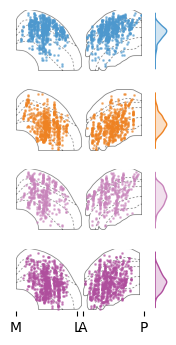

In [6]:
# Plot spatial distribution of subgrups - Fig 1Db

# load the atlas SC images

dir1=file=''.join([data_path,'SC_AP_modified.tif'])
im_AP = imageio.imread(dir1)
img = Image.open(dir1)

dir2=file=''.join([data_path,'SC_ML_modified.tif'])
im_ML = imageio.imread(dir2)

im_AP=img.resize((im_AP.shape[0],im_ML.shape[0]))

# normalize 3D coordinates
 
coord3D_lab=['AP','depth_in_brain','ML']
#normalize values
ML_norm = ((coord3D[:,2] - ML_lim[0]) / (ML_lim[1] - ML_lim[0]))*im_ML.shape[1]
AP_norm = ((coord3D[:,0] - AP_lim[0]) / (AP_lim[1] - AP_lim[0]))*(673)+20
depth_norm = ((coord3D[:,1] -depth_lim[0]) / (depth_lim[1] - depth_lim[0]))*im_ML.shape[0]

coord3D_norm= np.transpose(np.array([ML_norm,AP_norm,depth_norm]))

# invert the ML axis first
max_val = im_ML.shape[1]
min_val = 0 
new_ML = np.array([max_val - val + min_val for val in ML_norm])
ML_norm = new_ML

# Plot it 
# just swap it
colors = ['#4D98CE','#EE8222','#c884bb','#AF4E9D','#7b376f','#7b376f'] 
dims = (4,3)
fig, axs = plt.subplots(*dims, figsize=(2.5,3), 
                        gridspec_kw={'width_ratios': [1, 1, 0.2], 
                                     'wspace': -0.4, 'hspace': 0.3}, #'wspace': -0.3, 'hspace': 0.3}, 
                        subplot_kw={'aspect': 1})

# Adjust the figure margins to eliminate whitespace
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

pos=np.arange(0,12,2)
pos_dist=np.arange(1,13,2)
modalities = [1,2,3,4]
for i in range(len(modalities)):
    this_ax = axs[i,0]
    ix = modalities[i]-1
    
    this_ax.set_anchor('E')
    this_ax.scatter(ML_norm[np.reshape(modality==ix+1,-1)],depth_norm[np.reshape(modality==ix+1,-1)],alpha=.5, color=colors[i],s=1)  
    this_ax.invert_yaxis()
    this_ax.imshow(im_ML)
    this_ax.spines.right.set_visible(False)
    this_ax.spines.top.set_visible(False)

    this_ax.spines['left'].set_position(('outward', 1))  # Move the left spine outward
    this_ax.spines['bottom'].set_position(('outward', 1))  # Move the bottom spine outward
    
    # Remove the axis line
    this_ax.spines.left.set_visible(False)
    this_ax.spines.bottom.set_visible(False)
    if i==len(modalities)-1:
        this_ax.set_xticks([0, len(im_ML)])
        this_ax.set_yticks([])
        this_ax.set_xticklabels(['M', 'L'])
    if i!=len(modalities)-1 :
        this_ax.axis('off')

    
for i in range(len(modalities)):
    this_ax = axs[i,1]
    ix = modalities[i]-1
    #this_ax.set_anchor('E')
    this_ax.scatter(AP_norm[np.reshape(modality==ix+1,-1)],depth_norm[np.reshape(modality==ix+1,-1)],alpha=.5,color=colors[i],s=1)
    this_ax.invert_yaxis()
    this_ax.imshow(im_AP)   
    this_ax.spines.right.set_visible(False)
    this_ax.spines.top.set_visible(False)
    this_ax.spines['left'].set_position(('outward', 1))  # Move the left spine outward
    this_ax.spines['bottom'].set_position(('outward', 1))  # Move the bottom spine outward
    
    # Remove the axis line
    this_ax.spines.left.set_visible(False)
    this_ax.spines.bottom.set_visible(False)
    if i==len(modalities)-1:
        this_ax.set_xticks([0, len(im_ML)])
        this_ax.set_xticklabels(['A', 'P'])
        this_ax.set_yticks([])
    if i!=len(modalities)-1 :
        this_ax.axis('off')
        
for i in range(len(modalities)):
    this_ax = axs[i,2]
    ix = modalities[i]-1
    sns.kdeplot(y=depth_norm[np.reshape(modality==ix+1,-1)], color=colors[i], fill=True, ax=this_ax)
    this_ax.invert_yaxis()
    this_ax.axis('off')
    asp = np.diff(this_ax.get_xlim())[0] / np.diff(this_ax.get_ylim())[0]
    this_ax.set_aspect(-5*asp)
    plt.draw()       

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1Db.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


In [8]:
# save dataframe for LMM testing (Matlab) 

# Define modality labels
modality_labels = np.array(['non-responsive', 'visual', 'auditory', 'audio-visual', 'gated'])
modality_str = modality_labels[modality.astype(int)]

# Create a DataFrame
df = pd.DataFrame({
    'depth_norm': depth_norm,
    'modality': modality_str,
    'animal_ID': animal_ID,
    'experiment_ID': experiment_ID
})

# Save to CSV
df.to_csv(''.join([data_path,'neurons_datasets\\depth_distribution_neurons.csv']), index=False)


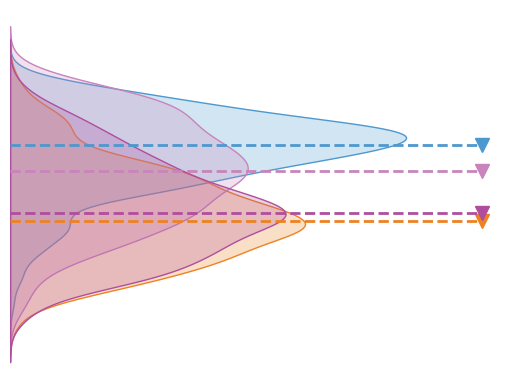

In [9]:
fig, ax = plt.subplots()

for i in range(len(modalities)):
    ix = modalities[i]-1
    values = depth_norm[np.reshape(modality==ix+1, -1)]  # values for this modality
    sns.kdeplot(y=values, color=colors[i], fill=True, ax=ax)
    
    # Calculate median
    median_value = np.nanmedian(values)
    
    # Plot a triangle marker at the median
    ax.plot(0.005, median_value, marker="v", color=colors[i], markersize=10)
    ax.hlines(y=median_value, xmin=0, xmax=0.005, color=colors[i], linestyles='--', linewidth=2)

ax.axis('off')
plt.draw()
ax.invert_yaxis()
saving_path = 'C:\\Users\\bianchg\\Documents\\GitHub\\Bianchini2025_SC\\Figures_output\\'
dir = ''.join([saving_path,'Figure1Dc.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

In [10]:
# Plot second section of Figure 1 - RF mapping
# this uses a second dataset that needs to be loaded 

# load dataset
file=''.join([data_path,'neurons_datasets\\retinotopy_dataset.mat'])
data_dict = mat73.loadmat(file)
DAT=data_dict['retinotopy_dataset']

#check keys available
print(DAT.keys())

#I want to extract all keys in DAT and have them as arrays
for k in DAT.keys():
    globals()[k] = DAT[k]

dict_keys(['AUD', 'AUD_coords', 'AUD_fits_interp', 'AUD_peaks', 'AUD_r', 'AV', 'MULTI', 'MULTI_coords', 'MULTI_fits_interp', 'MULTI_peaks', 'VIS', 'VIS_coords', 'VIS_fits_interp', 'VIS_peaks', 'VIS_r', 'animal_ID', 'coord3D', 'experiment_ID', 'locs', 'n_col', 'n_rows', 'neuron_ID', 'slices_degrees', 'stims'])


In [11]:
# set as positive degrees the azimuths for plotting purposes 

VIS_coords[:,0] = VIS_coords[:,0]*-1
AUD_coords[:,0] = AUD_coords[:,0]*-1
MULTI_coords[:,0] = MULTI_coords[:,0]*-1
slices_degrees = slices_degrees*-1

C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\848034076.py:105: RuntimeWarning: divide by zero encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\848034076.py:105: RuntimeWarning: invalid value encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))


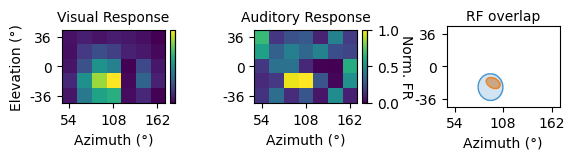

In [12]:
# plot example unisensory neuron - Figure 1E,F

aud_n = 68
vis_n = 89
this_neuron = vis_n

asp = 1.3
dims = (1,3)
fig, axs = plt.subplots(*dims, figsize=(8.3*(3/5),1),
                        gridspec_kw={'wspace': 0.7})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Visual response subplot
ax = axs[0]
RF = VIS_peaks[vis_n,:]
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data, (int(n_col), int(n_rows))),1,0)
im = ax.imshow(norm_data)
ax.set_title('Visual Response',fontsize = 10)
ax.set_ylabel('Elevation (°)',fontsize = 10)
ax.set_xlabel('Azimuth (°)',fontsize = 10)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(['36', '0', '-36'])
ax.set_xticks([0, 3, 6])
labels_ticks = slices_degrees[this_neuron,:].astype(int)
labels= [labels_ticks[0],labels_ticks[3],labels_ticks[6]]
ax.set_xticklabels(labels,fontsize = 10)
ax.invert_xaxis()  
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.set_yticks([])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)

# Auditory response subplot
ax = axs[1]
RF = AUD_peaks[aud_n,:]
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data,  (int(n_col), int(n_rows))),1,0)
im = ax.imshow(norm_data)
ax.set_title('Auditory Response',fontsize = 10)
ax.set_xlabel('Azimuth (°)',fontsize = 10)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(['36', '0', '-36'])
ax.set_xticks([0, 3, 6])
ax.set_xticklabels(labels,fontsize = 10)
labels_ticks = slices_degrees[this_neuron,:].astype(int)
labels= [labels_ticks[0],labels_ticks[3],labels_ticks[6]]
ax.invert_xaxis()  
divider = make_axes_locatable(ax)
norm = LogNorm(vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.set_yticks([0,0.5,1],fontsize = 10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.set_label('Norm. FR',rotation=-90,labelpad=10, fontsize=10)

# plot RF overlap 
ax = axs[2]
# Define the colors for the colormaps
colors_vis = [(1, 1, 1), '#4D98CE']  # White to blue
colors_aud = [(1, 1, 1), '#EE8222']   # White to red

# Create the colormaps
cmap_vis = LinearSegmentedColormap.from_list('vis_cm', colors_vis, N=256)
cmap_aud = LinearSegmentedColormap.from_list('aud_cm', colors_aud, N=256)

# Plot RF overlap
ax.set_title('RF overlap',fontsize = 10)

# Plot VIS_fits_interp
interp_vis = VIS_fits_interp[:, :, vis_n]
half_peak_vis = (np.nanmax(interp_vis) - np.nanmin(interp_vis)) / 1.3
half_peak_vis += np.nanmin(interp_vis)
interp_binary_vis = interp_vis >= half_peak_vis
ax.imshow(interp_binary_vis, cmap=cmap_vis, alpha=0.5)  # Set alpha to make it semi-transparent
ax.invert_yaxis()

# Plot AUD_fits_interp
interp_aud = AUD_fits_interp[:, :, aud_n]
half_peak_aud = (np.nanmax(interp_aud) - np.nanmin(interp_aud)) / 1.3
half_peak_aud += np.nanmin(interp_aud)
interp_binary_aud = interp_aud >= half_peak_aud
ax.imshow(interp_binary_aud, cmap=cmap_aud, alpha=0.5)  # Set alpha to make it semi-transparent

contours_aud = ax.contour(interp_binary_aud, levels=[0.5], colors='#EE8222',linewidths=1)
contours_vis = ax.contour(interp_binary_vis, levels=[0.5], colors='#4D98CE',linewidths=1)
ax.set_xlim([0, interp_vis.shape[1]])
ax.set_ylim([0, interp_vis.shape[0]])
ax.set_xticks([])
ax.set_yticks([])
ax.invert_yaxis()
ax.invert_xaxis()  
ax.spines[:].set_visible(False)

ax2 = fig.add_subplot(*dims,3)
ax2.patch.set_alpha(0)
    
RF = np.zeros((35,1))
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data,  (int(n_col), int(n_rows))),1,0)
im = ax2.imshow(norm_data)
ax2.set_xlabel('Azimuth (°)',fontsize = 10)
ax2.set_yticks([0, 2, 4])
ax2.set_yticklabels(['36', '0', '-36'])
ax2.set_xticks([0, 3, 6])
ax2.set_xticklabels(labels,fontsize = 10)
ax2.invert_xaxis()

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1E_F.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\1304472404.py:50: RuntimeWarning: divide by zero encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\1304472404.py:50: RuntimeWarning: invalid value encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))


Correlation coefficient (Azimuth): 0.8662411654689236 | p-value: 0.0005630500466927811
Correlation coefficient (Elevation): 0.104199038125292 | p-value: 0.7604508694709206


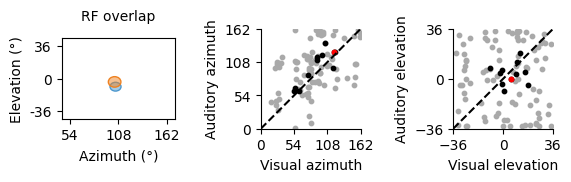

In [13]:
# plot population RF overlap - Figure 1G,H

dims = (1,3)
asp = 0.5
fig, axs = plt.subplots(*dims, figsize=(8.3*(3/5),1),
                        gridspec_kw={'wspace': 0.7})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Select recording
ax = axs[0]
recs = np.unique(experiment_ID)
r = recs[6]  # chosen recording
pos = np.argwhere(experiment_ID == r)
vis_coord = np.squeeze(VIS_coords[pos, :])
aud_coord = np.squeeze(AUD_coords[pos, :])

# Define colors
colors_vis = [(1, 1, 1), '#4D98CE']  # White to blue
colors_aud = [(1, 1, 1), '#EE8222']  # White to red
cmap_vis = LinearSegmentedColormap.from_list('vis_cm', colors_vis, N=256)
cmap_aud = LinearSegmentedColormap.from_list('aud_cm', colors_aud, N=256)

# Plot RF overlap
ax.set_title('RF overlap', fontsize=10)

# Compute and plot Visual RF ellipse
vis_mean, vis_ci_90 = compute_stats(vis_coord)
add_ellipse(ax, vis_mean, vis_ci_90, edgecolor='#4D98CE', facecolor=(77/255, 152/255, 206/255, 0.5))

# Compute and plot Auditory RF ellipse
aud_mean, aud_ci_90 = compute_stats(aud_coord)
add_ellipse(ax, aud_mean, aud_ci_90, edgecolor='#EE8222', facecolor=(238/255, 130/255, 34/255, 0.5))

# Axis settings
ax.set_ylim([-36, 36])
min_value = np.min(slices_degrees[pos[0], :])
max_value = np.max(slices_degrees[pos[0], :])
ax.set_xlim([min_value, max_value])
ax.set_xticks([])
ax.set_yticks([])
ax.invert_yaxis()
ax.invert_xaxis() 
ax.spines[:].set_visible(False)

# Second subplot (RF heatmap)
ax2 = fig.add_subplot(*dims, 1)
ax2.patch.set_alpha(0)

RF = np.zeros((35, 1))
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data, (int(n_col), int(n_rows))), 1, 0)

im = ax2.imshow(norm_data)
ax2.set_ylabel('Elevation (°)', fontsize=10)
ax2.set_xlabel('Azimuth (°)', fontsize=10)
ax2.set_yticks([0, 2, 4])
ax2.set_yticklabels(['36', '0', '-36'])
ax2.set_xticks([0, 3, 6])
labels_ticks = np.squeeze(slices_degrees[pos[0], :]).astype(int)
ax2.invert_xaxis() 
ax2.set_xticklabels([labels_ticks[0], labels_ticks[3], labels_ticks[6]], fontsize=10)

# now we plot the correlation of azhimuth and elevation for every multisensory neuron
recs = np.unique(experiment_ID)
vis_coord,aud_coord = [],[]
vis_coord_all,aud_coord_all = [],[]
vis_sd, aud_sd = [], []
for r in recs:
    pos = np.argwhere(experiment_ID==r)
    vis_c,aud_c = [],[]
    
    for p in pos:
        if VIS[p] == 1:
            vis_c.append(VIS_coords[p,:])
        if AUD[p] ==1:            
            aud_c.append(AUD_coords[p,:])
        
        if VIS[p] == 1 and AUD[p] ==1 or AV[p]==1:
            vis_coord_all.append(VIS_coords[p,:])
            aud_coord_all.append(AUD_coords[p,:])
                             
    vis_c = np.squeeze(np.array(vis_c))
    aud_c = np.squeeze(np.array(aud_c))
    
    vis_coord.append(np.mean(vis_c,axis=0))
    aud_coord.append(np.mean(aud_c,axis=0))
    vis_sd.append(np.std(vis_c,axis=0))
    aud_sd.append(np.std(aud_c,axis=0))
    
vis_coord = np.squeeze(np.array(vis_coord))
aud_coord = np.squeeze(np.array(aud_coord))
vis_coord_all = np.squeeze(np.array(vis_coord_all))
aud_coord_all = np.squeeze(np.array(aud_coord_all))

# plot mean azimuth for all multisensory neurons
ax = axs[1]
ax.scatter(vis_coord_all[:,0],aud_coord_all[:,0],s=10,c='#A9A9A9') # all AV neurons
ax.scatter(vis_coord[:,0],aud_coord[:,0],s=10,c='k')
ax.scatter(vis_coord[6,0],aud_coord[6,0],s=10,c='r')
min_value = np.min(slices_degrees)
max_value =np.max(slices_degrees)
x_values = np.linspace(min_value, max_value, 10)
ax.plot(x_values, x_values, 'k--')
ax.set_xlim([min_value,  max_value])
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 54)
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xlabel('Visual azimuth',fontsize = 10)
ax.set_ylabel('Auditory azimuth',fontsize = 10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_aspect('equal')

# plot mean azimuth for all multisensory neurons
ax = axs[2]
ax.scatter(vis_coord_all[:,1],aud_coord_all[:,1],s=10,c='#A9A9A9') # all AV neurons
ax.scatter(vis_coord[:,1],aud_coord[:,1],s=10,c='k')
ax.scatter(vis_coord[6,1],aud_coord[6,1],s=10,c='r')
min_value = -36
max_value =36
x_values = np.linspace(min_value, max_value, 10)
ax.plot(x_values, x_values, 'k--')
ax.set_xlim([min_value,  max_value])
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 36)
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xlabel('Visual elevation',fontsize = 10)
ax.set_ylabel('Auditory elevation',fontsize = 10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_aspect('equal')

# Compute correlations
CC_A, pA = stats.pearsonr(vis_coord[:,0], aud_coord[:,0])
CC_E, pE = stats.pearsonr(vis_coord[:,1], aud_coord[:,1])

print("Correlation coefficient (Azimuth):", CC_A, "| p-value:", pA)
print("Correlation coefficient (Elevation):", CC_E, "| p-value:", pE)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1G_H.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\144989700.py:144: RuntimeWarning: divide by zero encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\144989700.py:144: RuntimeWarning: invalid value encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))


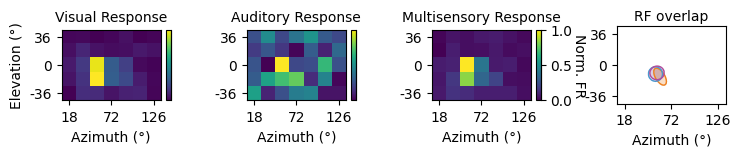

In [14]:
# plot example multinsory neuron - Figure 1I,J

asp = 1.3
dims = (1,4)
fig, axs = plt.subplots(*dims, figsize=(8.3*(4/5),1),
                        gridspec_kw={'width_ratios': [1, 1, 1, 1], 
                                     'wspace': 0.7})

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
# selected multisensory neuron
this_neuron = 37

# Visual response subplot
ax = axs[0]
RF = VIS_peaks[this_neuron,:]
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data, (int(n_col), int(n_rows))),1,0)
im = ax.imshow(norm_data)
ax.set_title('Visual Response',fontsize = 10)
ax.set_ylabel('Elevation (°)',fontsize = 10)
ax.set_xlabel('Azimuth (°)',fontsize = 10)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(['36', '0', '-36'])
ax.set_xticks([0, 3, 6])
labels_ticks = slices_degrees[this_neuron,:].astype(int)
labels= [labels_ticks[0],labels_ticks[3],labels_ticks[6]]
ax.set_xticklabels(labels,fontsize = 10)
ax.invert_xaxis() 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.set_yticks([])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)


# Auditory response subplot
ax = axs[1]
RF = AUD_peaks[this_neuron,:]
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data,  (int(n_col), int(n_rows))),1,0)
im = ax.imshow(norm_data)
ax.set_title('Auditory Response',fontsize = 10)
ax.set_xlabel('Azimuth (°)',fontsize = 10)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(['36', '0', '-36'])
ax.set_xticks([0, 3, 6])
ax.set_xticklabels(labels,fontsize = 10)
labels_ticks = slices_degrees[this_neuron,:].astype(int)
labels= [labels_ticks[0],labels_ticks[3],labels_ticks[6]]
ax.invert_xaxis() 
divider = make_axes_locatable(ax)
norm = LogNorm(vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.set_yticks([])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)


# Multisensory response subplot
ax = axs[2]
RF = MULTI_peaks[this_neuron,:]
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
#norm_data = np.reshape(norm_data,  (int(n_rows), int(n_col)))
norm_data = np.swapaxes(np.reshape(norm_data,  (int(n_col), int(n_rows))),1,0)
im = ax.imshow(norm_data)
ax.set_title('Multisensory Response',fontsize = 10)
#ax.set_ylabel('Elevation (°)',fontsize = 10)
ax.set_xlabel('Azimuth (°)',fontsize = 10)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(['36', '0', '-36'])
ax.set_xticks([0, 3, 6])
ax.set_xticklabels(labels,fontsize = 10)
labels_ticks = slices_degrees[this_neuron,:].astype(int)
labels= [labels_ticks[0],labels_ticks[3],labels_ticks[6]]
ax.invert_xaxis() 
divider = make_axes_locatable(ax)
norm = LogNorm(vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.set_yticks([0,0.5,1],fontsize = 10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.set_label('Norm. FR',rotation=-90,labelpad=10, fontsize=10)

# plot RF overlap 
ax = axs[3]
# Define the colors for the colormaps
colors_vis = [(1, 1, 1), '#4D98CE']  # White to blue
colors_aud = [(1, 1, 1), '#EE8222']   # White to red
colors_multi = [(1, 1, 1), '#dfb9d8']   # White to red

# Create the colormaps
cmap_vis = LinearSegmentedColormap.from_list('vis_cm', colors_vis, N=256)
cmap_aud = LinearSegmentedColormap.from_list('aud_cm', colors_aud, N=256)
cmap_multi = LinearSegmentedColormap.from_list('multi_cm', colors_multi, N=256)

# Plot RF overlap
ax.set_title('RF overlap',fontsize = 10)

# Plot VIS_fits_interp
interp_vis = VIS_fits_interp[:, :, this_neuron]
half_peak_vis = (np.nanmax(interp_vis) - np.nanmin(interp_vis)) / 1.3
half_peak_vis += np.nanmin(interp_vis)
interp_binary_vis = interp_vis >= half_peak_vis
ax.imshow(interp_binary_vis, cmap=cmap_vis, alpha=0.5)  # Set alpha to make it semi-transparent
ax.invert_yaxis()

# Plot AUD_fits_interp
interp_aud = AUD_fits_interp[:, :, this_neuron]
half_peak_aud = (np.nanmax(interp_aud) - np.nanmin(interp_aud)) / 1.3
half_peak_aud += np.nanmin(interp_aud)
interp_binary_aud = interp_aud >= half_peak_aud
ax.imshow(interp_binary_aud, cmap=cmap_aud, alpha=0.5)  # Set alpha to make it semi-transparent

# Plot multi_fits_interp
interp_multi = MULTI_fits_interp[:, :, this_neuron]
half_peak_multi = (np.nanmax(interp_multi) - np.nanmin(interp_multi)) / 1.3
half_peak_multi += np.nanmin(interp_multi)
interp_binary_multi = interp_multi >= half_peak_aud
ax.imshow(interp_binary_multi, cmap=cmap_multi, alpha=0.5)  # Set alpha to make it semi-transparent

contours_aud = ax.contour(interp_binary_aud, levels=[0.5], colors='#EE8222',linewidths=1)
contours_vis = ax.contour(interp_binary_vis, levels=[0.5], colors='#4D98CE',linewidths=1)
contours_multi = ax.contour(interp_binary_multi, levels=[0.5], colors='#AF4E9D',linewidths=1)
ax.set_xlim([0, interp_vis.shape[1]])
ax.set_ylim([0, interp_vis.shape[0]])
ax.set_xticks([])
ax.set_yticks([])
ax.invert_yaxis()
ax.invert_xaxis() 
ax.spines[:].set_visible(False)

ax2 = fig.add_subplot(*dims,4)
ax2.patch.set_alpha(0)
    
RF = np.zeros((35,1))
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(np.reshape(norm_data,  (int(n_col), int(n_rows))),1,0)
im = ax2.imshow(norm_data)
#ax.set_ylabel('Elevation (°)',fontsize = 10)
ax2.set_xlabel('Azimuth (°)',fontsize = 10)
ax2.set_yticks([0, 2, 4])
ax2.set_yticklabels(['36', '0', '-36'])
ax2.set_xticks([0, 3, 6])
ax2.set_xticklabels(labels,fontsize = 10)
ax2.invert_xaxis() 
# and save it 
dir = ''.join([saving_path,'Figure1I_J.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\3949201908.py:40: RuntimeWarning: divide by zero encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9380\3949201908.py:40: RuntimeWarning: invalid value encountered in divide
  norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))


Correlation coefficient (Azimuth): 0.5649127965798872 | p-value: 8.081255338896314e-09
Correlation coefficient (Elevation): 0.23531220222204532 | p-value: 0.02643107698053144


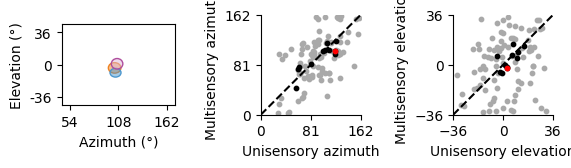

In [15]:
# plot population RF overlap for multisensory RF - Figure 1K,L

# Initialize figure
dims = (1, 3)
fig, axs = plt.subplots(*dims, figsize=(8.3*(3/5), 1), gridspec_kw={'wspace': 0.7})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Select a recording
recs = np.unique(experiment_ID)
r = recs[6]  # Chosen recording
pos = np.argwhere(experiment_ID == r).flatten()

# Extract coordinates
vis_coord = VIS_coords[pos, :]
aud_coord = AUD_coords[pos, :]
multi_coord = MULTI_coords[pos, :]

# Compute statistics
vis_mean, ci_90_vis = compute_stats(vis_coord)
aud_mean, ci_90_aud = compute_stats(aud_coord)
multi_mean, ci_90_multi = compute_stats(multi_coord)

# Plot confidence ellipses
ax = axs[0]
add_ellipse(ax, aud_mean, ci_90_aud, '#EE8222', (238/255, 130/255, 34/255, 0.5))
add_ellipse(ax, vis_mean, ci_90_vis, '#4D98CE', (77/255, 152/255, 206/255, 0.5))
add_ellipse(ax, multi_mean, ci_90_multi, '#AF4E9D', (223/255, 185/255, 216/255, 0.5))

# Axis settings
ax.set_ylim([-36, 36])
min_value, max_value = np.min(slices_degrees[pos[0], :]), np.max(slices_degrees[pos[0], :])
ax.set_xlim([min_value, max_value])
ax.set_xticks([]); ax.set_yticks([]); ax.invert_yaxis(); ax.spines[:].set_visible(False)
ax.invert_xaxis() 
# Second subplot (RF heatmap)
ax2 = fig.add_subplot(*dims, 1)
ax2.patch.set_alpha(0)

RF = np.zeros((35, 1))
norm_data = (RF - np.nanmin(RF)) / (np.nanmax(RF) - np.nanmin(RF))
norm_data = np.swapaxes(norm_data.reshape((int(n_col), int(n_rows))), 1, 0)
im = ax2.imshow(norm_data)

# Axes formatting
ax2.set_ylabel('Elevation (°)', fontsize=10)
ax2.set_xlabel('Azimuth (°)', fontsize=10)
ax2.set_yticks([0, 2, 4])
ax2.set_yticklabels(['36', '0', '-36'])
ax2.set_xticks([0, 3, 6])
labels_ticks = np.squeeze(slices_degrees[pos[0], :]).astype(int)
ax2.set_xticklabels([labels_ticks[0], labels_ticks[3], labels_ticks[6]], fontsize=10)
ax2.invert_xaxis() 

# plot mean azimuth for all multisensory neurons
# take any neuron that is responsive and compare vis and aud to multi RF
recs = np.unique(experiment_ID)
# Initialize lists
vis_coord, aud_coord, multi_coord = [], [], []
vis_means, aud_means, multi_means = [], [], []

for r in recs:
    pos = np.argwhere(experiment_ID == r).flatten()  # Get indices for this recording
    
    vis_c, aud_c, multi_c = [], [], []
    
    for p in pos:
        # First condition: Collect coordinates where (VIS=1 and AUD=1) or AV=1
        if (VIS[p] == 1 and AUD[p] == 1) or AV[p] == 1:
            vis_coord.append(VIS_coords[p, :])
            aud_coord.append(AUD_coords[p, :])
            multi_coord.append(MULTI_coords[p, :])
        
        # Second condition: Separate VIS, AUD, and MULTI for mean computation
        if VIS[p] == 1:
            vis_c.append(VIS_coords[p, :])
        if AUD[p] == 1:
            aud_c.append(AUD_coords[p, :])
        if VIS[p] == 1 or AUD[p] == 1 or AV[p] == 1:
            multi_c.append(MULTI_coords[p, :])

    # Compute mean for each recording (handle empty cases safely)
    vis_means.append(np.mean(vis_c, axis=0) if vis_c else np.zeros(VIS_coords.shape[1]))
    aud_means.append(np.mean(aud_c, axis=0) if aud_c else np.zeros(AUD_coords.shape[1]))
    multi_means.append(np.mean(multi_c, axis=0) if multi_c else np.zeros(MULTI_coords.shape[1]))

# Convert lists to NumPy arrays
vis_coord = np.squeeze(np.array(vis_coord))
aud_coord = np.squeeze(np.array(aud_coord))
multi_coord = np.squeeze(np.array(multi_coord))

vis_means = np.squeeze(np.array(vis_means))
aud_means = np.squeeze(np.array(aud_means))
multi_means = np.squeeze(np.array(multi_means))

# Compute unisensory means
unisensory_A_all = np.mean(np.stack((vis_means[:, 0], aud_means[:, 0])), axis=0)
unisensory_E_all = np.mean(np.stack((vis_means[:, 1], aud_means[:, 1])), axis=0)
multi_coord_all = multi_means  # Already computed per recording


ax = axs[1]
unisensory = np.stack((vis_coord[:,0],aud_coord[:,0]))
unisensory_A = np.mean(unisensory,axis=0)

ax.scatter(unisensory_A,multi_coord[:,0],s=10,c='#A9A9A9') # all AV neurons
ax.scatter(unisensory_A_all,multi_coord_all[:,0],s=10,c='k') # means recordings
ax.scatter(unisensory_A_all[6],multi_coord_all[6,0],s=10,c='r') # example recording

min_value,max_value = [np.min(slices_degrees),np.max(slices_degrees)]
x_values = np.linspace(min_value, max_value, 10)
ax.plot(x_values, x_values, 'k--')

ax.set_xlim([min_value,  max_value])
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 81)
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xlabel('Unisensory azimuth',fontsize = 10)
ax.set_ylabel('Multisensory azimuth',fontsize = 10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_aspect('equal')

# plot mean azimuth for all multisensory neurons
ax = axs[2]
unisensory = np.stack((vis_coord[:,1],aud_coord[:,1]))
unisensory_E = np.mean(unisensory,axis=0)

ax.scatter(unisensory_E,multi_coord[:,1],s=10,c='#A9A9A9') # all AV neurons
ax.scatter(unisensory_E_all,multi_coord_all[:,1],s=10,c='k') # means recordings
ax.scatter(unisensory_E_all[6],multi_coord_all[6,1],s=10,c='r') # example recording

min_value,max_value = [-36,36]
x_values = np.linspace(min_value, max_value, 10)
ax.plot(x_values, x_values, 'k--')

ax.set_xlim([min_value,  max_value])
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 36)
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xlabel('Unisensory elevation',fontsize = 10)
ax.set_ylabel('Multisensory elevation',fontsize = 10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_aspect('equal')

# Compute correlations
CC_A, pA = stats.pearsonr(np.mean([vis_coord[:, 0], aud_coord[:, 0]], axis=0), multi_coord[:, 0])
CC_E, pE = stats.pearsonr(np.mean([vis_coord[:, 1], aud_coord[:, 1]], axis=0), multi_coord[:, 1])

print("Correlation coefficient (Azimuth):", CC_A, "| p-value:", pA)
print("Correlation coefficient (Elevation):", CC_E, "| p-value:", pE)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure1K_L.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)